<a href="https://colab.research.google.com/github/Ignacioruuizm/BD_CS_MACHINE_LEARNING/blob/Pablo/informe_tecnico_fmy0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

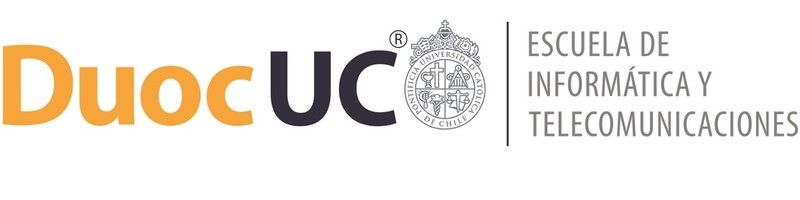

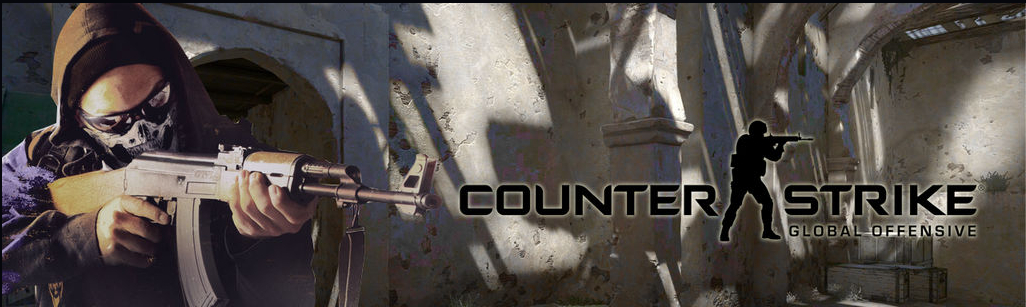

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Ignacio Ruiz, Pablo Riquelme,Pedro Barrientos

Docente: Giocrisrai Godoy

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

Integrantes: Ignacio Ruiz, Pablo Riquelme,Pedro Barrientos



1. Contexto del Negocio

Valve Corporation ha solicitado apoyo en el análisis y modelado de datos de partidas de Counter Strike: Global Offensive CS:GO. Este videojuego competitivo enfrenta a dos equipos terroristas y contra-terroristas en múltiples rondas, donde cada jugador puede desempeñar un rol clave en el éxito o fracaso del equipo.

La empresa busca entender, a través de técnicas de *Machine Learning*, qué factores influyen en el rendimiento individual y colectivo de los jugadores, para poder:

- Mejorar la experiencia de juego.
- Detectar patrones de juego irregulares.
- Ajustar balanceos o detectar posibles trampas.
- Incorporar sistemas predictivos en emparejamiento y diseño de juego.

2. Comprensión del Problema

El dataset entregado cuenta con más de 79.000 registros, cada uno representando a un jugador en una ronda determinada. Contiene variables cuantitativas y categóricas sobre comportamiento, rendimiento, equipamiento, y estado del jugador y su equipo durante la partida.

Desde una perspectiva de *Machine Learning*, podemos abordar el problema como:

- Un problema de clasificación: predecir resultados categóricos (Ej: ¿ganará la ronda? ¿sobrevivirá el jugador?).
- Un problema de regresión: predecir valores numéricos (Ej: ¿cuánto tiempo estará vivo el jugador? ¿cuánta distancia recorrerá?).



In [16]:
# Fase 2: Data Understanding

# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar archivo con delimitador automático (maneja errores comunes con engine='python')
file_path = '/content/Anexo ET_demo_round_traces_2022.csv'  # Cambia este path si es necesario
df = pd.read_csv(file_path, sep=None, engine='python')
# Verificamos las columnas para asegurarnos que se cargó bien
print("Columnas cargadas:")
print(df.columns.tolist())



Columnas cargadas:
['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']


In [17]:
print("\nPrimeras 5 filas:")
display(df.head())

print("\nResumen estadístico:")
display(df.describe())



Primeras 5 filas:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0



Resumen estadístico:


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [18]:
# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Eliminar filas con valores nulos en las columnas relevantes
df_clean = df.dropna(subset=['TimeAlive', 'TravelledDistance'])

# Asegurarse de que las columnas son numéricas (forzar conversión a numérico)
df_clean['TimeAlive'] = pd.to_numeric(df_clean['TimeAlive'], errors='coerce')
df_clean['TravelledDistance'] = pd.to_numeric(df_clean['TravelledDistance'], errors='coerce')

# Eliminar filas con valores nulos resultantes de la conversión
df_clean = df_clean.dropna(subset=['TimeAlive', 'TravelledDistance'])

# Calcular la correlación
correlation = df_clean[['TimeAlive', 'TravelledDistance']].corr().iloc[0, 1]

# Imprimir la correlación
print("Correlación entre 'TimeAlive' y 'TravelledDistance':", correlation)





Valores nulos por columna:
Team           2
MatchWinner    1
dtype: int64
Correlación entre 'TimeAlive' y 'TravelledDistance': nan


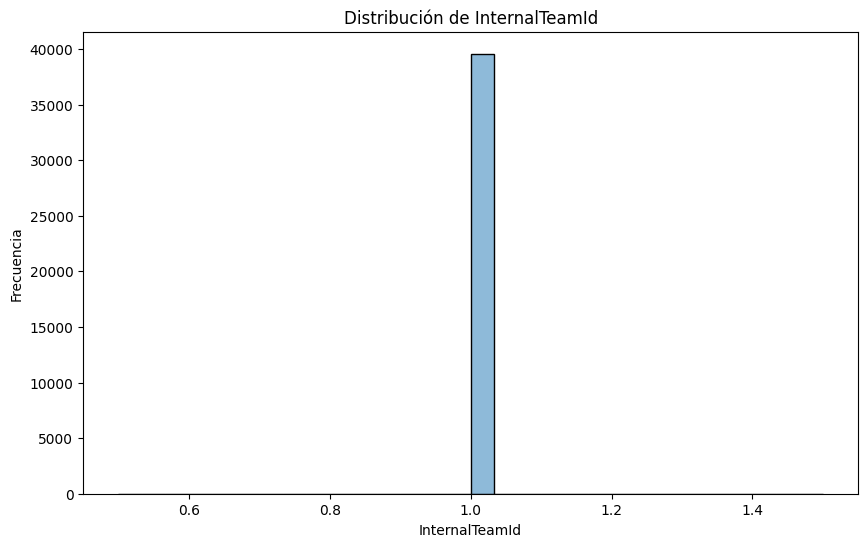

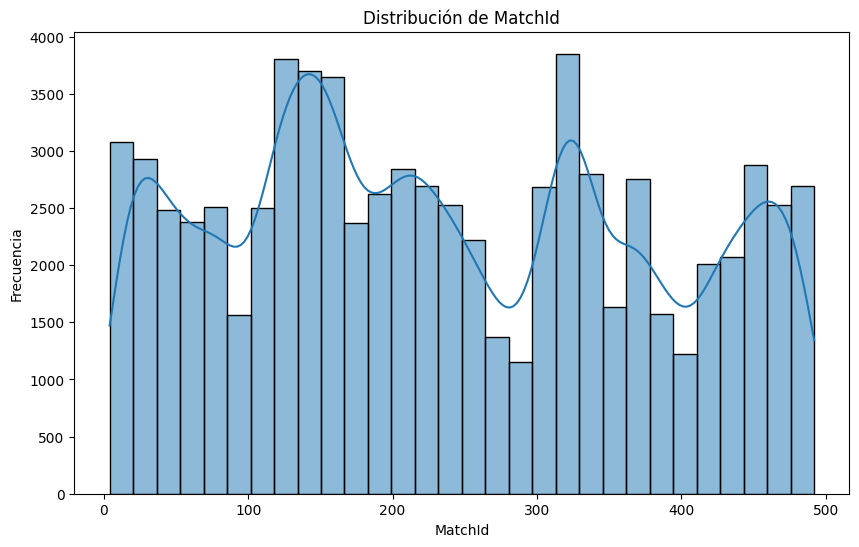

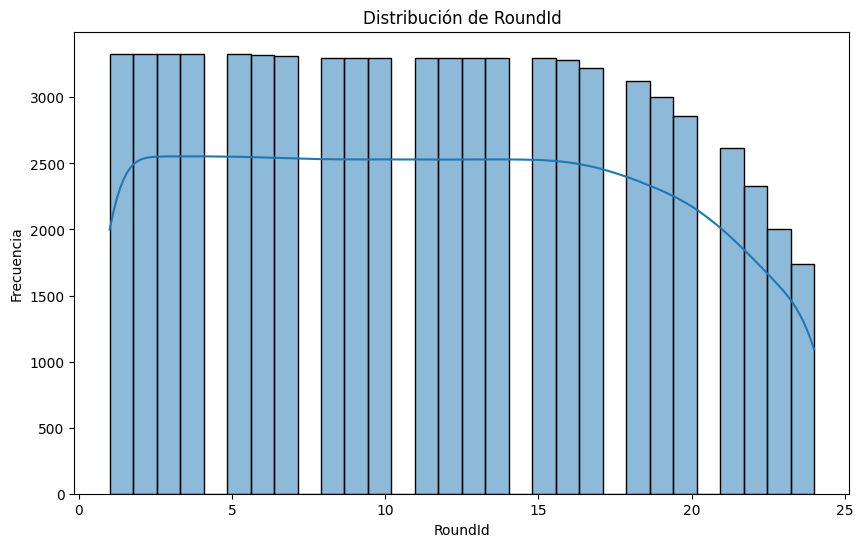

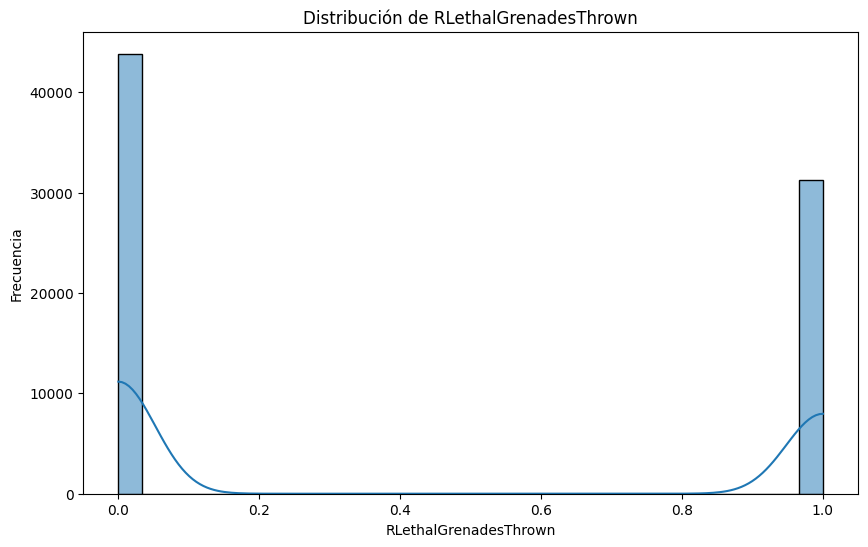

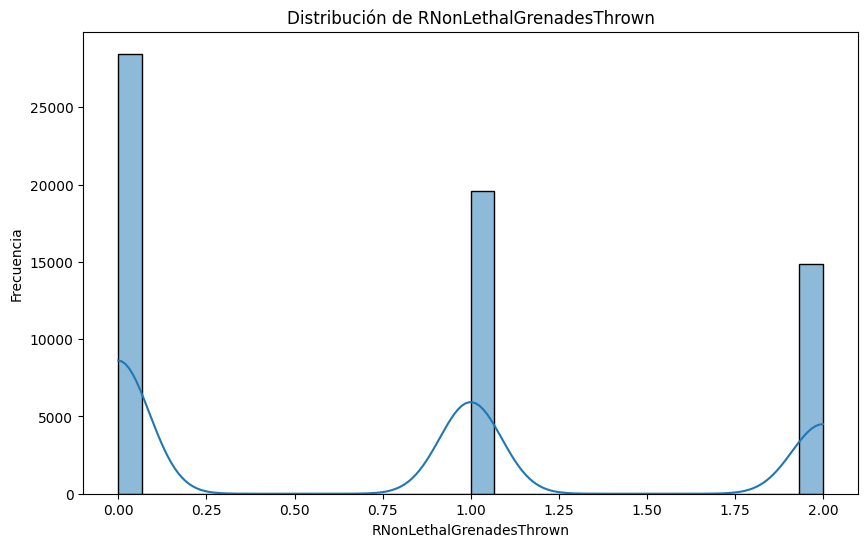

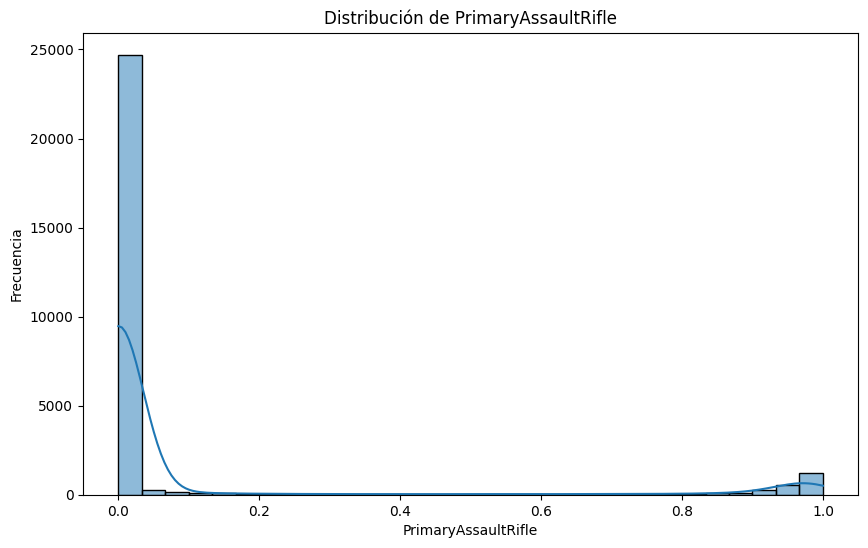

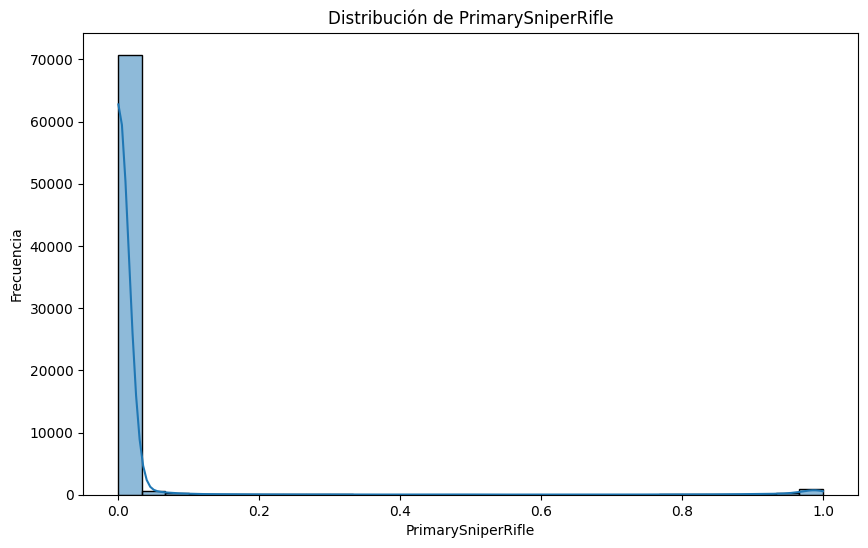

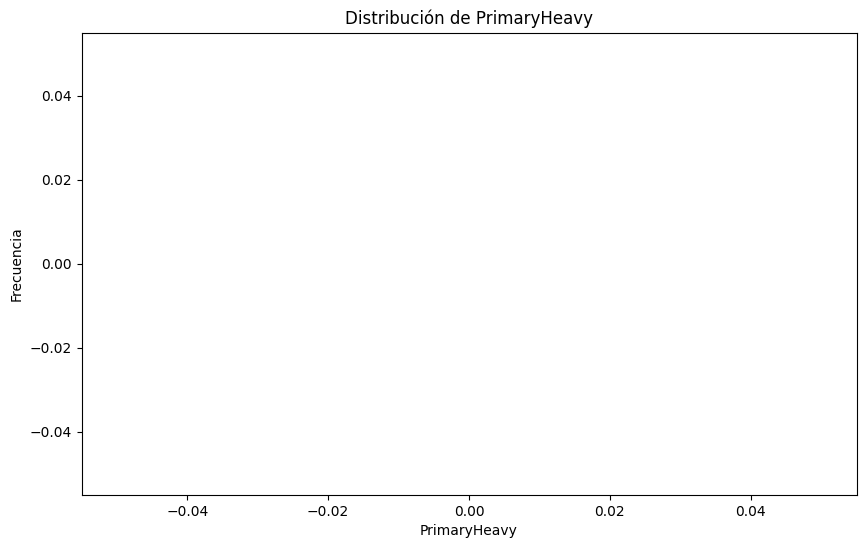

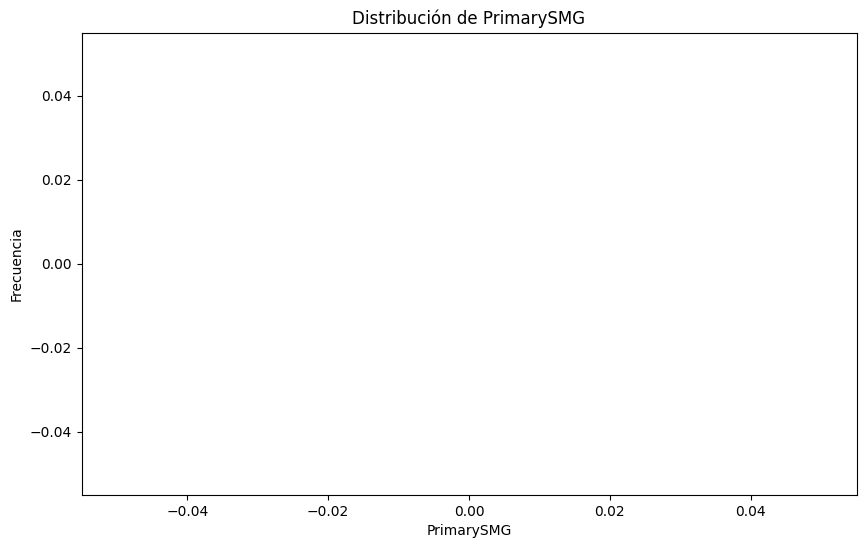

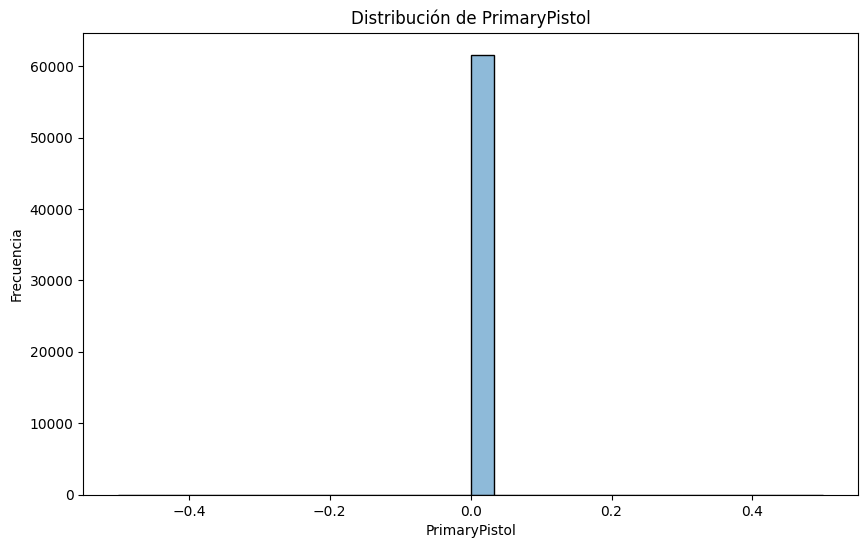

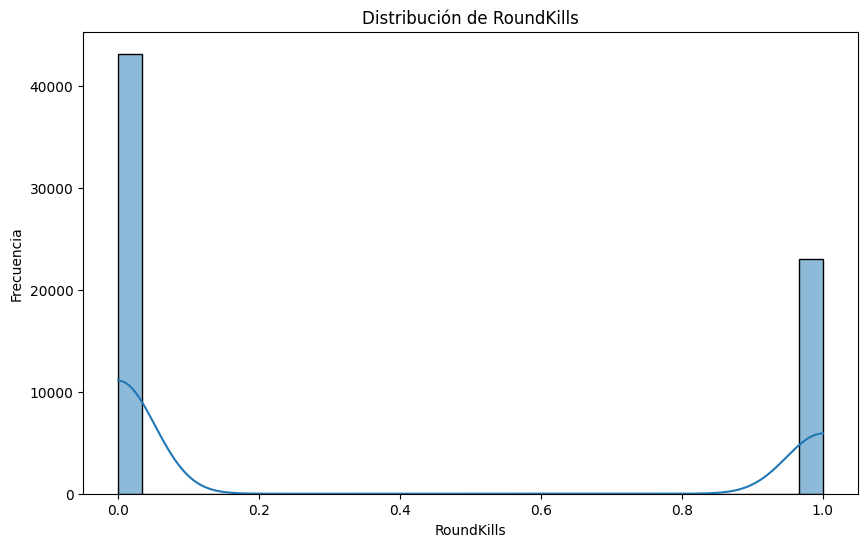

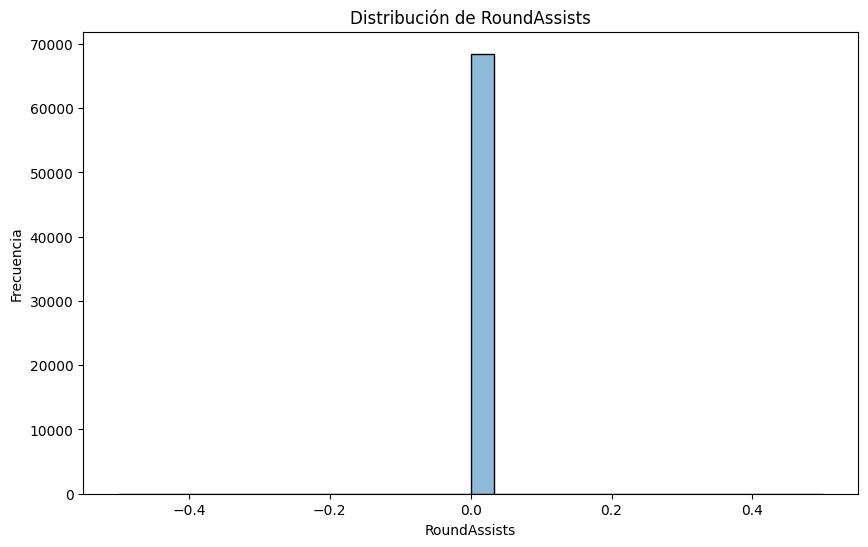

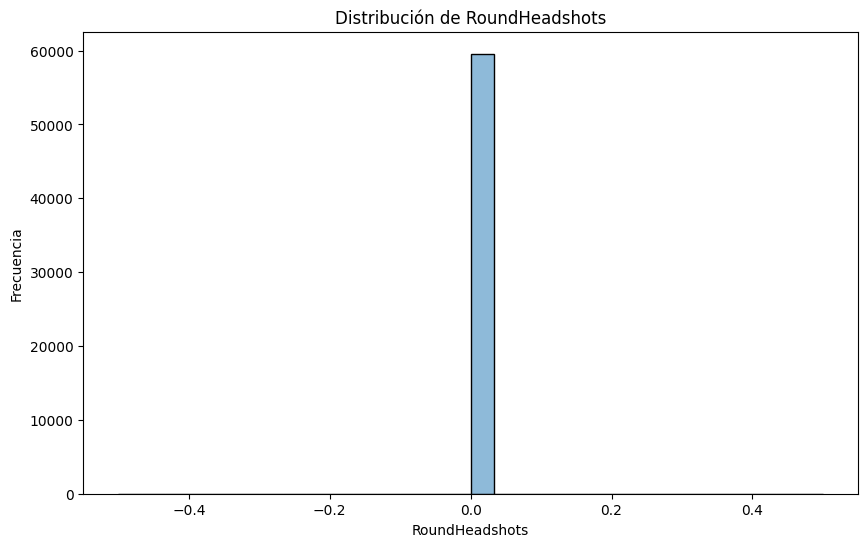

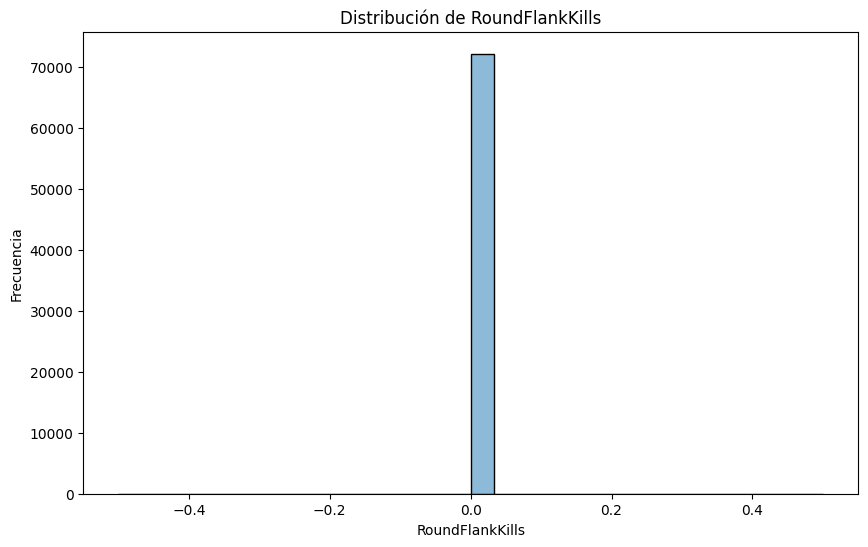

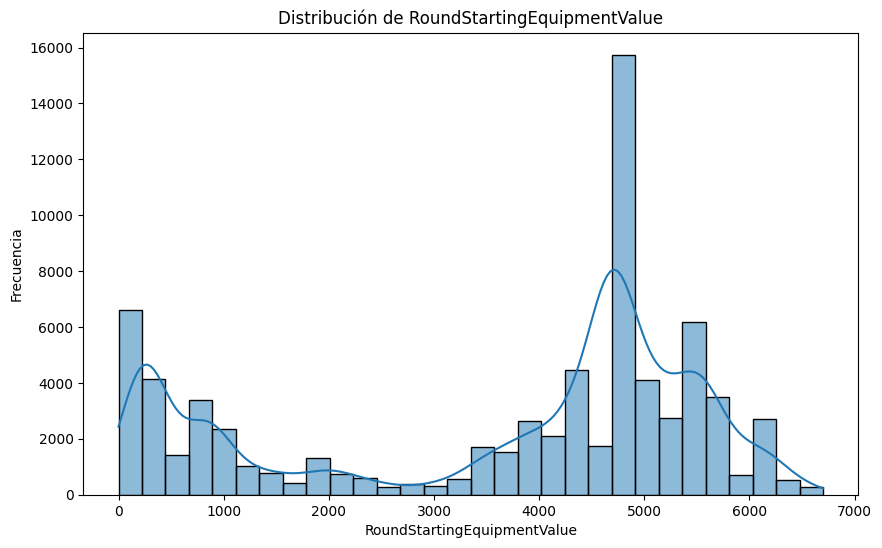

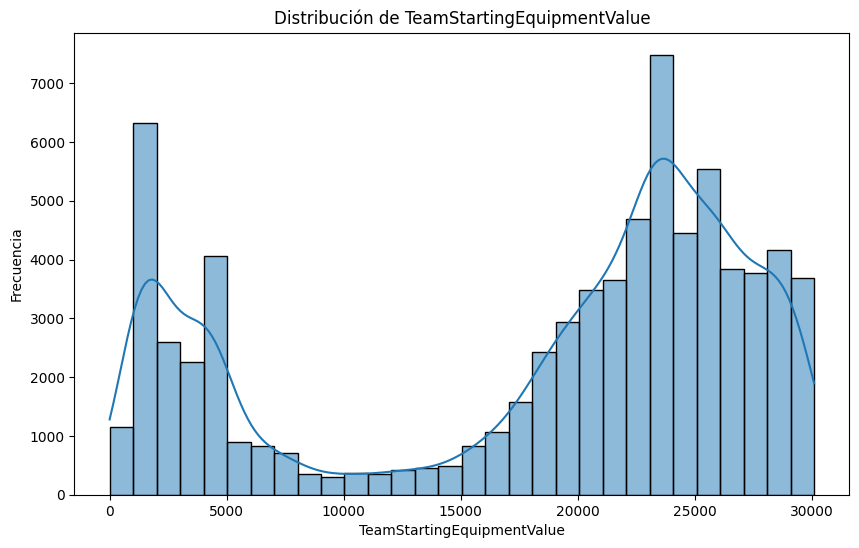

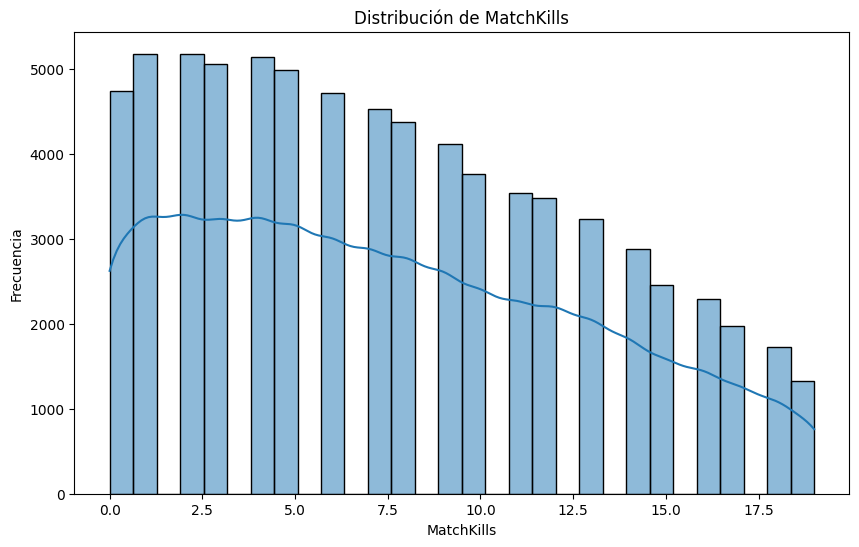

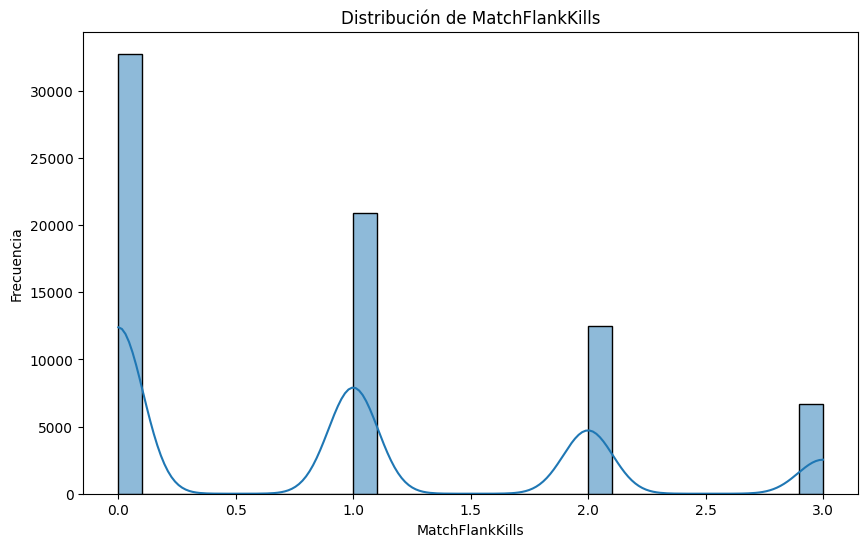

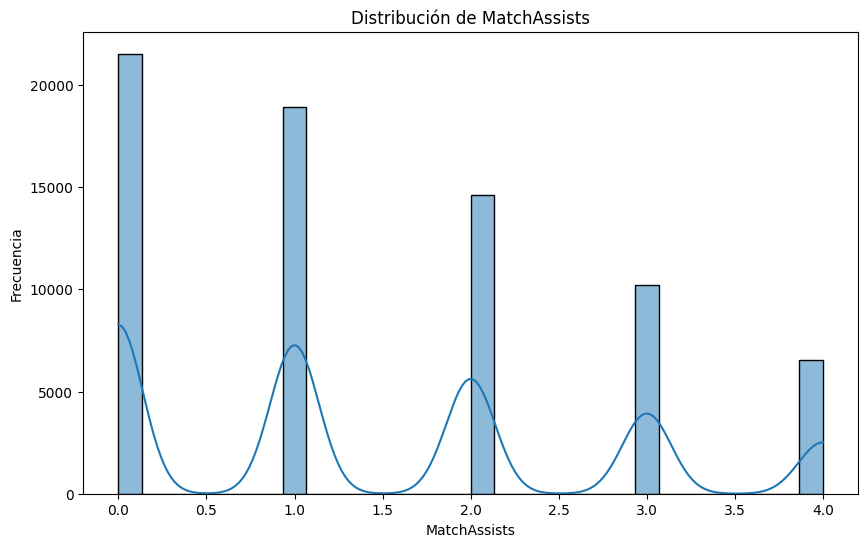

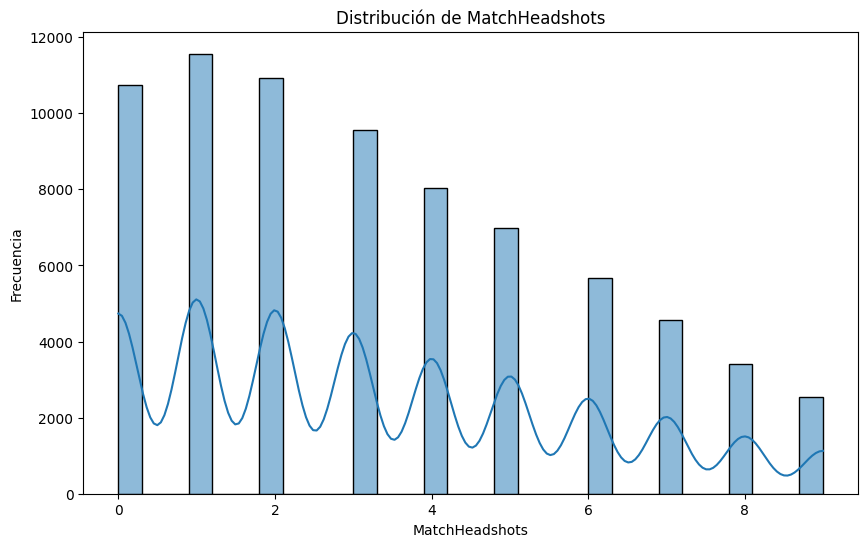

In [19]:
# Opcional: Eliminar columna no relevante
df = df.drop(columns=['Unnamed: 0'])

# Tomamos una muestra aleatoria de 1000 filas para mejorar el rendimiento
sample_df = df.sample(n=1000, random_state=42)

# Variables numéricas en el dataset
numeric_vars = df.select_dtypes(include='number').columns

# Visualización de distribuciones para cada variable numérica
for var in numeric_vars:
    if var in df.columns:
        plt.figure(figsize=(10, 6))
        # Filtramos valores atípicos (opcional) eliminando el 5% superior de los valores
        df_filtered = df[df[var] < df[var].quantile(0.95)]
        # Histograma con KDE (ajustamos bins y mostramos KDE)
        sns.histplot(df_filtered[var], bins=30, kde=True)
        plt.title(f'Distribución de {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.show()

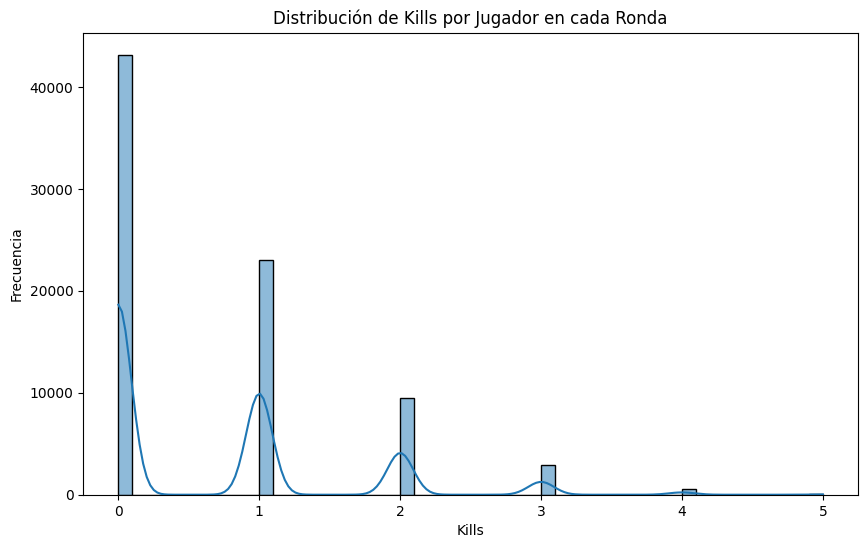

In [ ]:
# Analizar la distribución de Kills por jugador
plt.figure(figsize=(10, 6))
sns.histplot(df['RoundKills'], bins=50, kde=True)
plt.title('Distribución de Kills por Jugador en cada Ronda')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

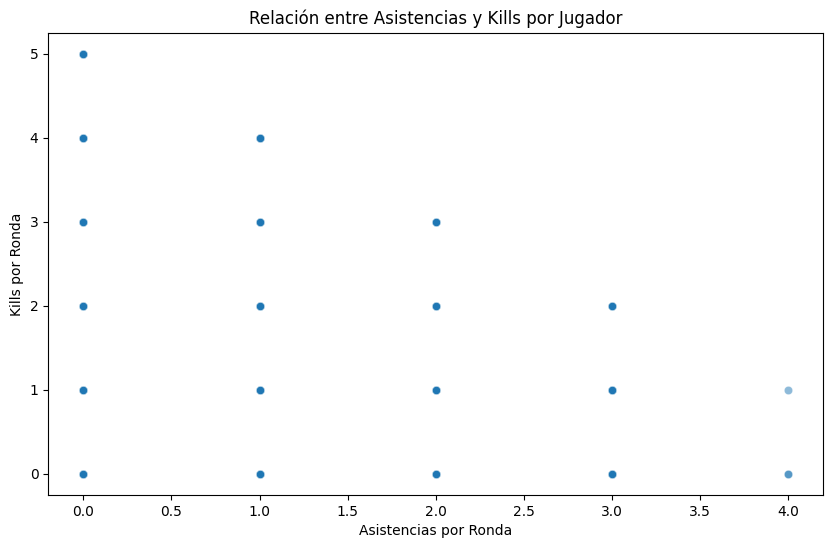

Correlación entre Asistencias y Kills: -0.021481967672222574


In [ ]:
# Relación entre Asistencias y Kills
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RoundAssists', y='RoundKills', alpha=0.5)
plt.title('Relación entre Asistencias y Kills por Jugador')
plt.xlabel('Asistencias por Ronda')
plt.ylabel('Kills por Ronda')
plt.show()

# Calcular la correlación entre Asistencias y Kills
correlacion = df[['RoundAssists', 'RoundKills']].corr().iloc[0, 1]
print(f"Correlación entre Asistencias y Kills: {correlacion}")

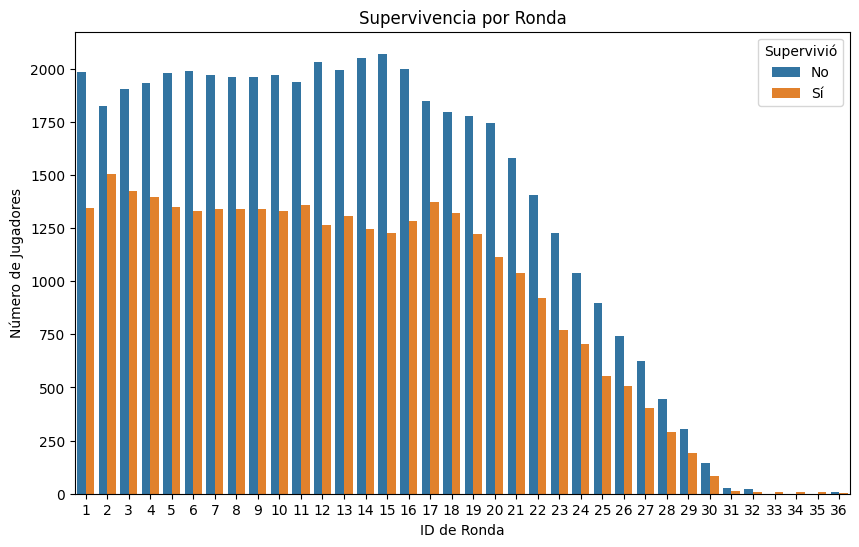

In [ ]:
# Analizar la relación entre la supervivencia y la ronda
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RoundId', hue='Survived')
plt.title('Supervivencia por Ronda')
plt.xlabel('ID de Ronda')
plt.ylabel('Número de Jugadores')
plt.legend(title='Supervivió', loc='upper right', labels=['No', 'Sí'])
plt.show()

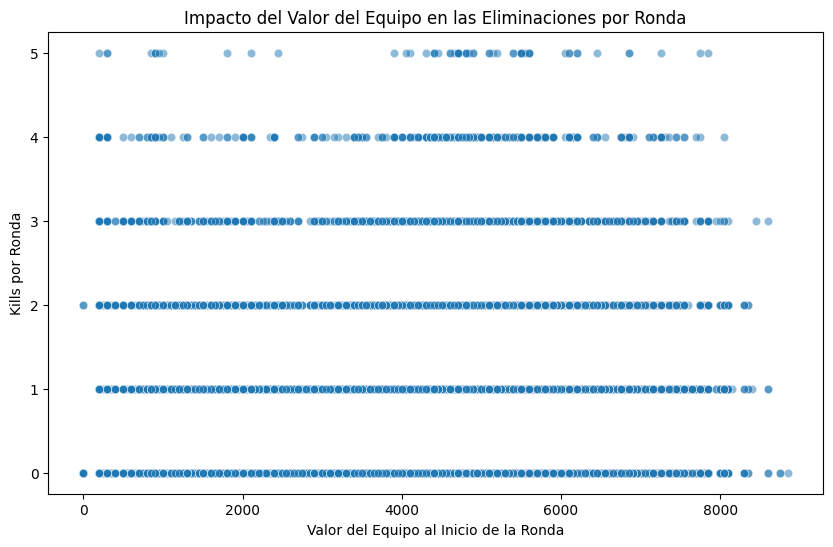

Correlación entre el Valor del Equipo y las Eliminaciones: 0.17214143826336517


In [ ]:
# Analizar el impacto del valor del equipo en las eliminaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RoundStartingEquipmentValue', y='RoundKills', alpha=0.5)
plt.title('Impacto del Valor del Equipo en las Eliminaciones por Ronda')
plt.xlabel('Valor del Equipo al Inicio de la Ronda')
plt.ylabel('Kills por Ronda')
plt.show()

# Calcular la correlación entre el valor del equipo y las eliminaciones
correlacion_equipo = df[['RoundStartingEquipmentValue', 'RoundKills']].corr().iloc[0, 1]
print(f"Correlación entre el Valor del Equipo y las Eliminaciones: {correlacion_equipo}")

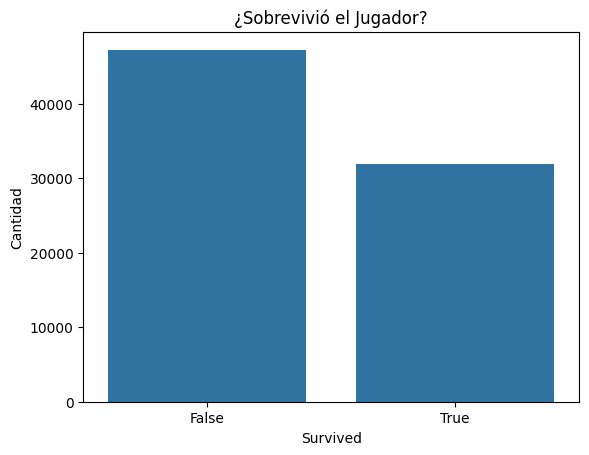

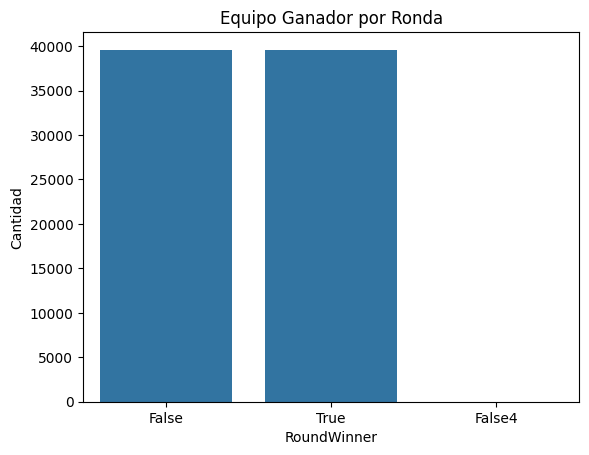

In [ ]:
# 6. Conteo de sobrevivientes y ganadores
if 'Survived' in df.columns:
    plt.figure()
    sns.countplot(x='Survived', data=df)
    plt.title('¿Sobrevivió el Jugador?')
    plt.xlabel('Survived')
    plt.ylabel('Cantidad')
    plt.show()

if 'RoundWinner' in df.columns:
    plt.figure()
    sns.countplot(x='RoundWinner', data=df)
    plt.title('Equipo Ganador por Ronda')
    plt.xlabel('RoundWinner')
    plt.ylabel('Cantidad')
    plt.show()

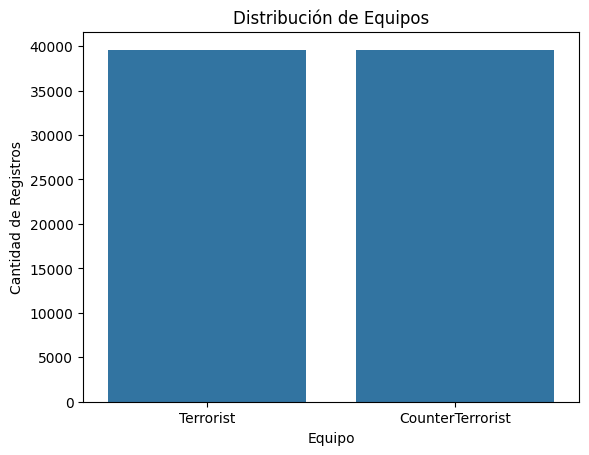

In [ ]:
# 7. Análisis de equipo
if 'Team' in df.columns:
    plt.figure()
    sns.countplot(x='Team', data=df)
    plt.title('Distribución de Equipos')
    plt.xlabel('Equipo')
    plt.ylabel('Cantidad de Registros')
    plt.show()

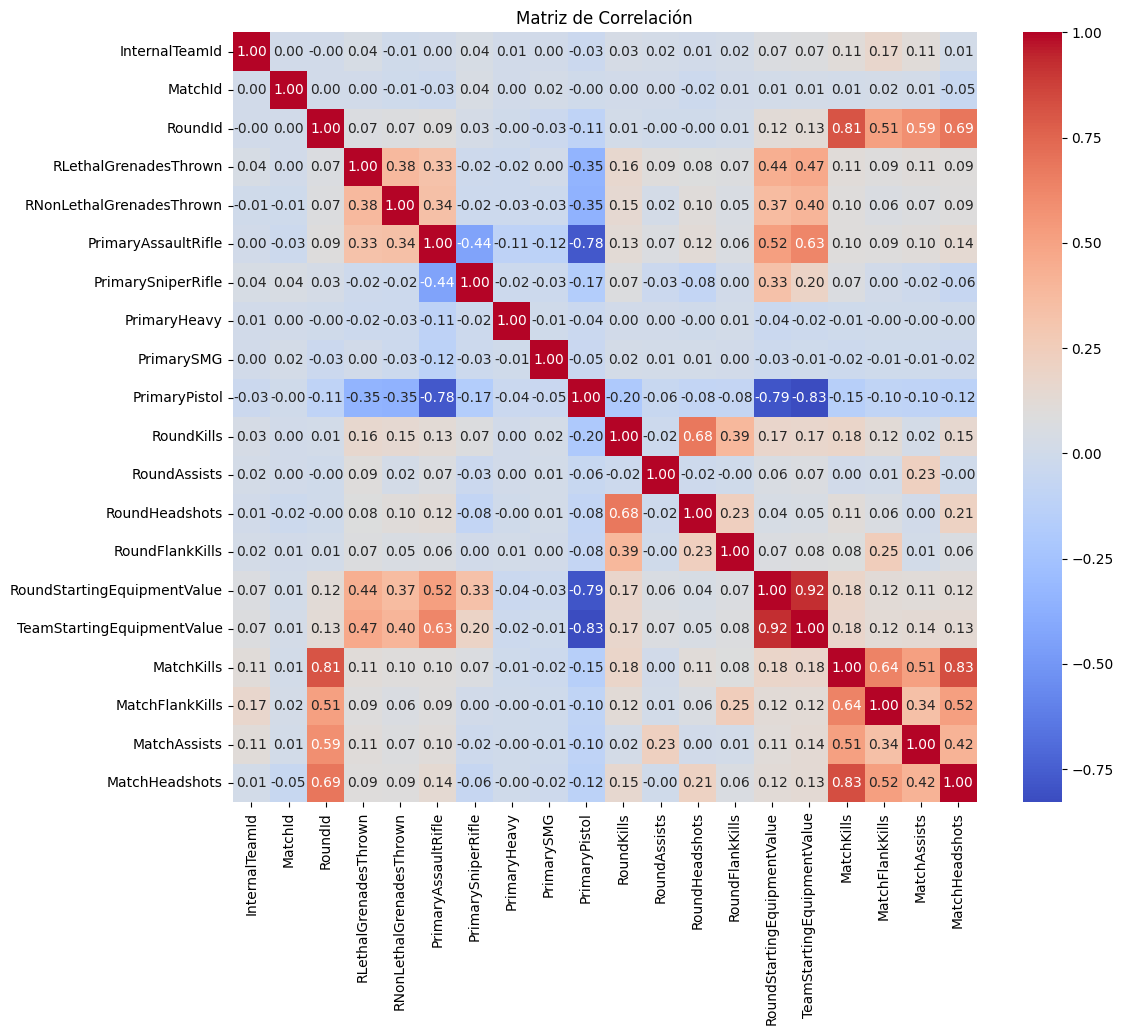

In [ ]:
# 8. Correlación entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [21]:
# Estadísticos descriptivos para obtener medidas de posición y dispersión
descripcion = df.describe(include='all')  # Include all columns (numéricas y categóricas)
print("Estadísticos descriptivos:")
display(descripcion)

Estadísticos descriptivos:


,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157,79155,79157.000000,79157.000000,79157.000000,79157,79156,79157,79157,79157,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
unique,4,2,NaN,NaN,NaN,3,2,2,1,51627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,de_inferno,Terrorist,NaN,NaN,NaN,False,False,False,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28869,39591,NaN,NaN,NaN,39588,42017,47214,79157,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.500006,250.525033,12.765517,NaN,NaN,NaN,NaN,NaN,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,NaN,NaN,0.500003,149.557804,7.432837,NaN,NaN,NaN,NaN,NaN,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,128.000000,6.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,2.000000,236.000000,12.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,NaN,NaN,2.000000,373.000000,19.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000


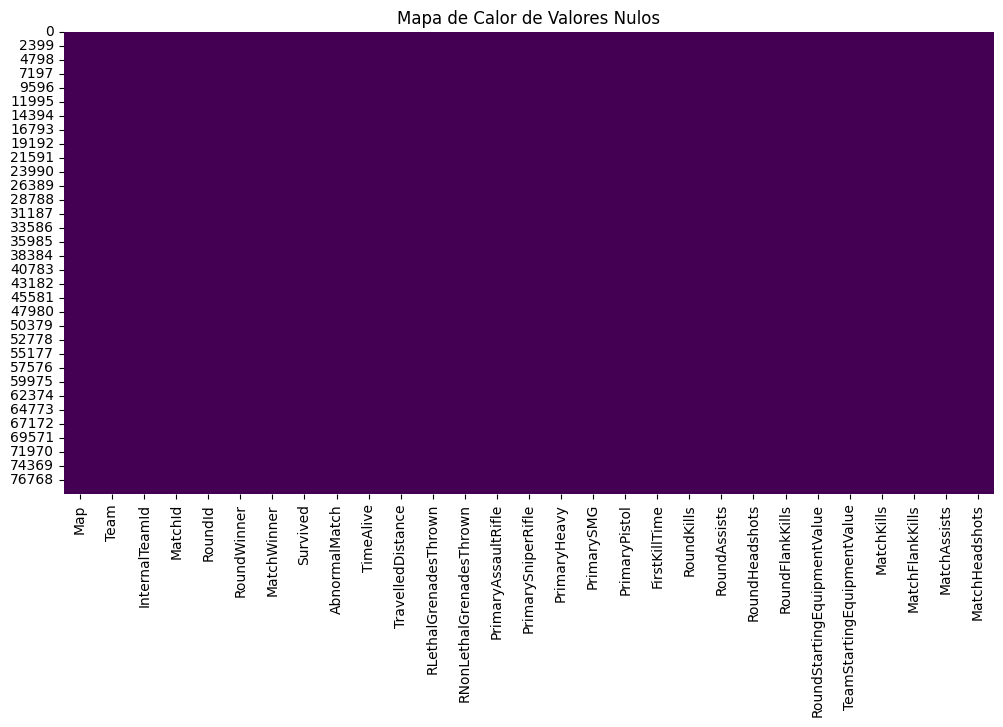

In [22]:
# Visualizar la cantidad de valores nulos por columna usando un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

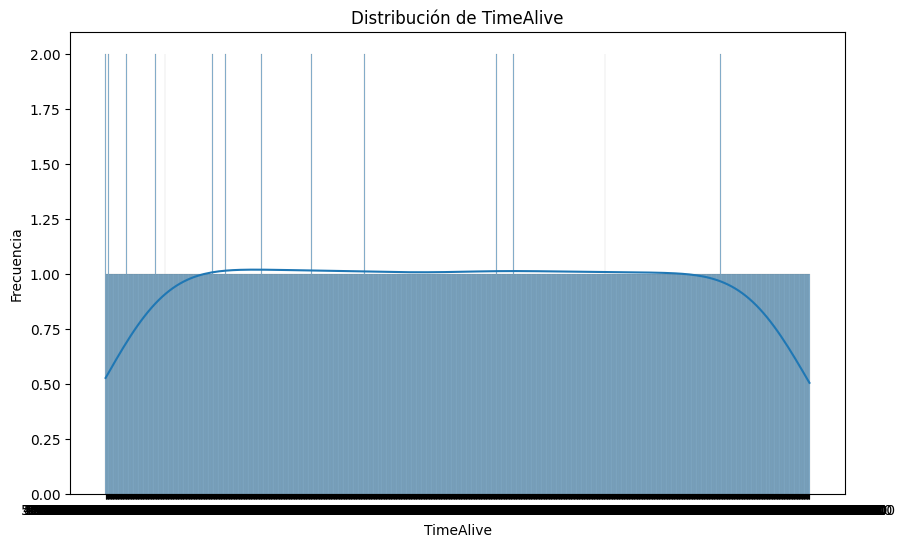

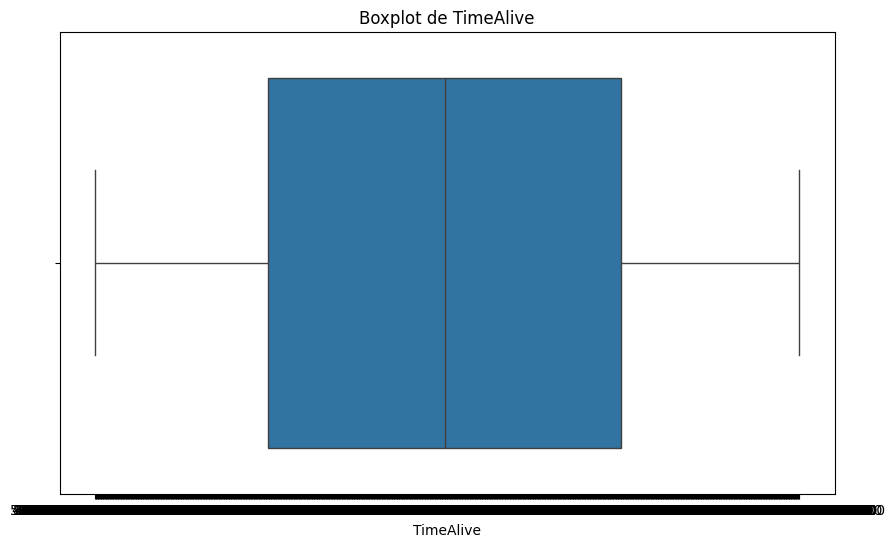

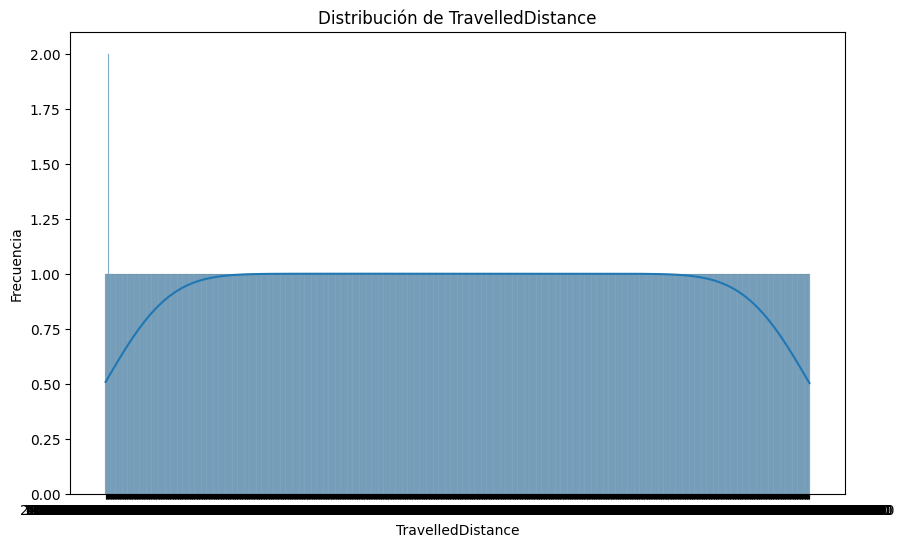

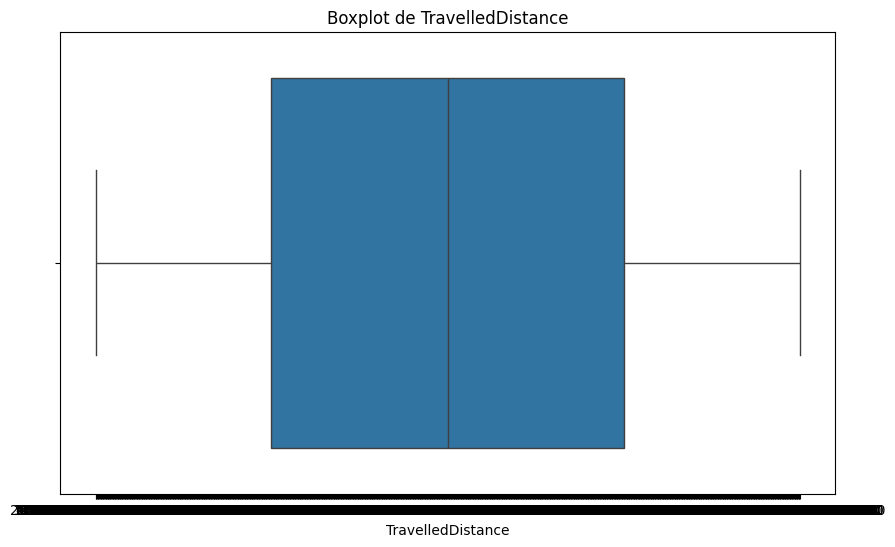

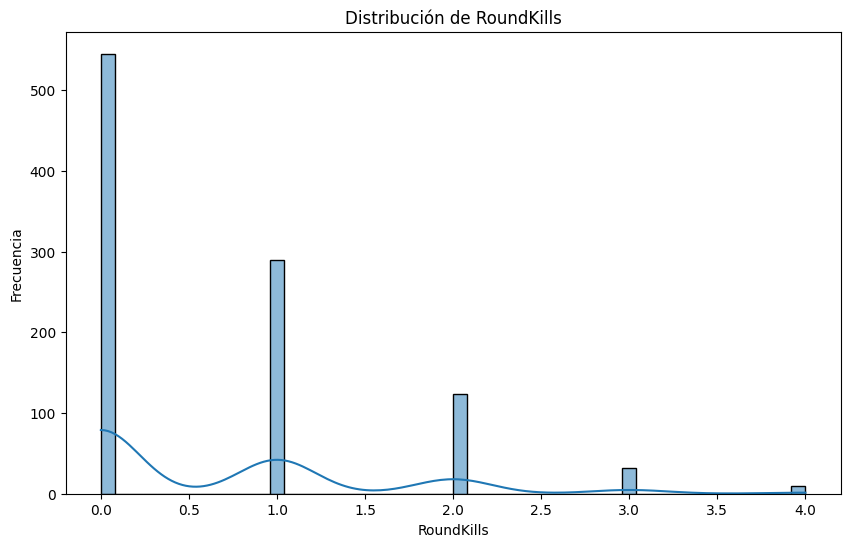

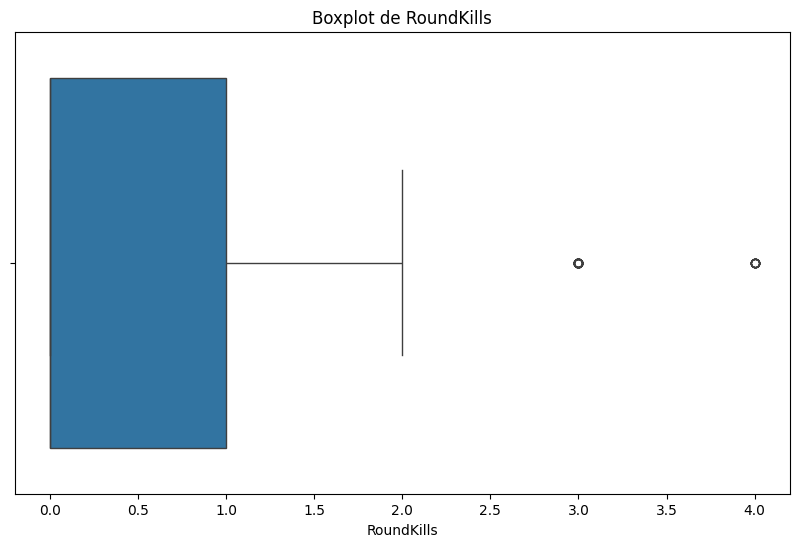

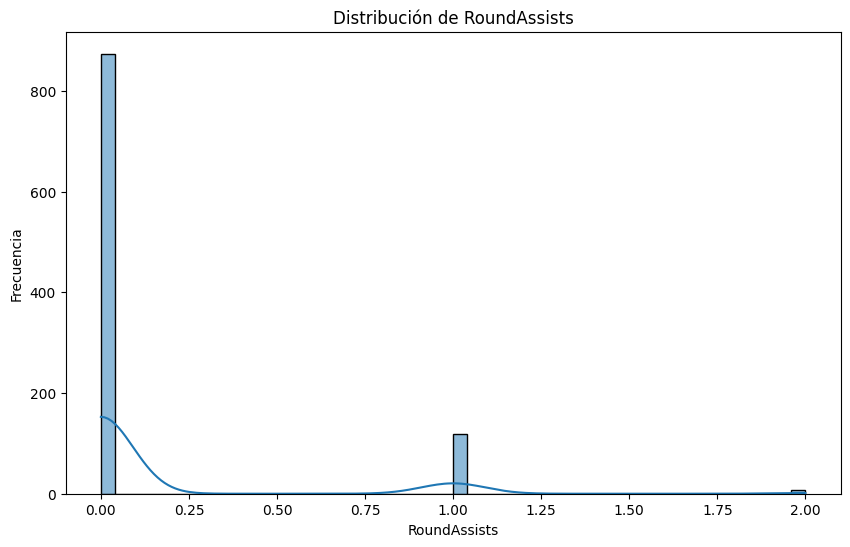

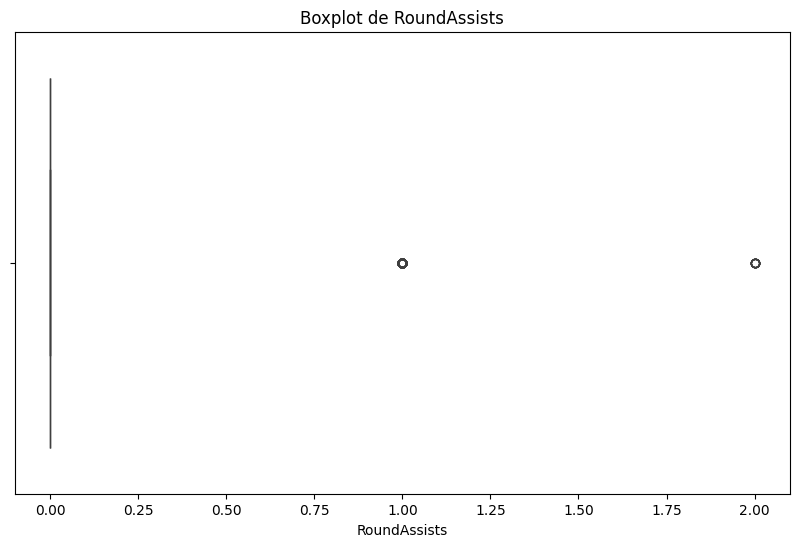

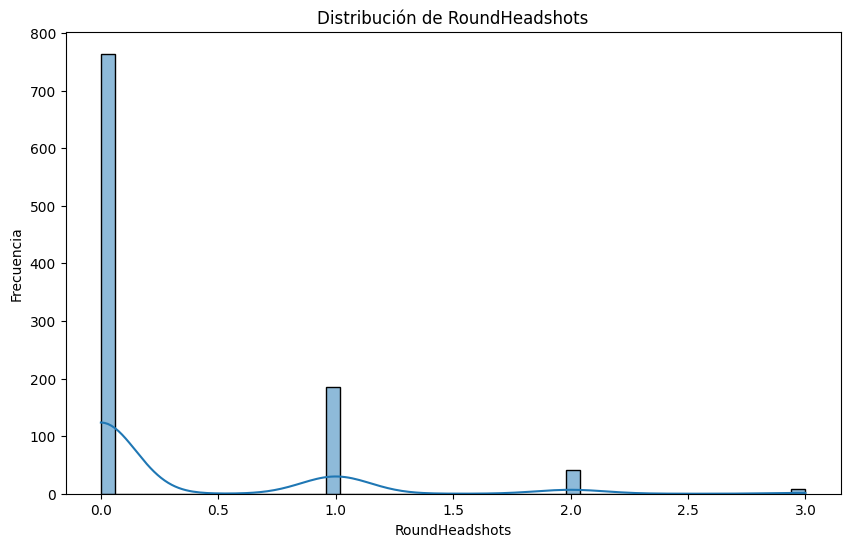

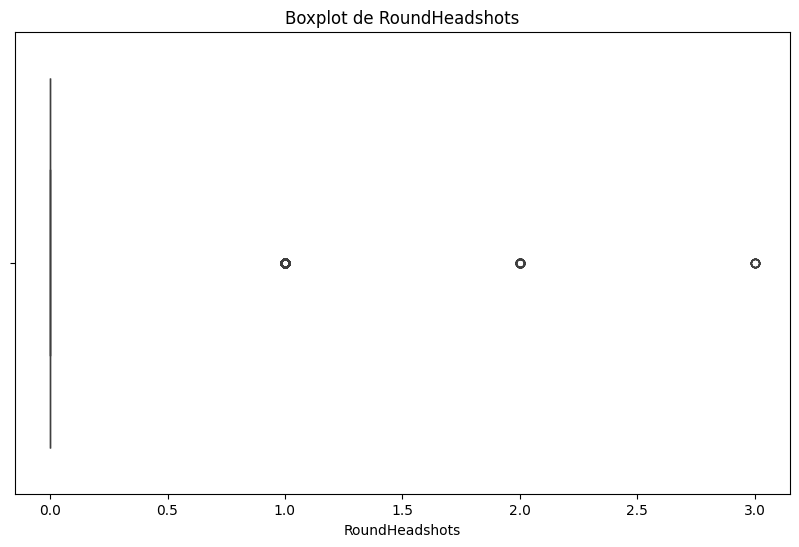

In [ ]:
# Tomamos una muestra aleatoria de 1000 filas para mejorar el rendimiento
df_sample = df.sample(n=1000, random_state=42)

# Visualizar la distribución de las variables numéricas clave con la muestra
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['TimeAlive', 'TravelledDistance', 'RoundKills', 'RoundAssists', 'RoundHeadshots']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample[var], kde=True, bins=50)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para ver la dispersión y posibles outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_sample[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()


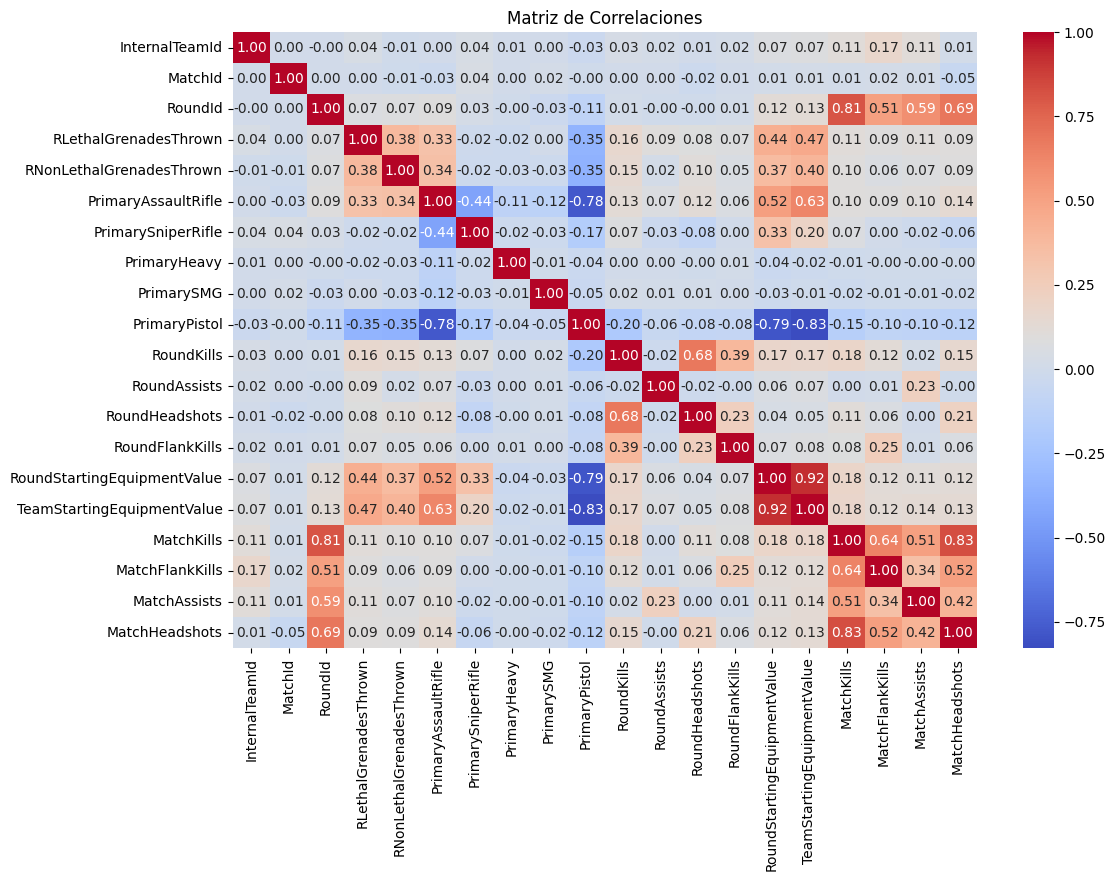

In [ ]:
# Calcular y mostrar la matriz de correlación
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlaciones')
plt.show()


In [ ]:
# Asegurarse de que las columnas son numéricas (forzar conversión a numérico)
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# Eliminar filas con valores nulos resultantes de la conversión (opcional)
df_cleaned = df.dropna(subset=['TimeAlive', 'TravelledDistance'])

# Medias, medianas, varianzas y desviaciones estándar de algunas variables numéricas
numerical_vars = ['TimeAlive', 'TravelledDistance']  # Puedes añadir más columnas aquí

for var in numerical_vars:
    print(f"\n{var}:")
    print(f"Media: {df_cleaned[var].mean()}")
    print(f"Mediana: {df_cleaned[var].median()}")
    print(f"Varianza: {df_cleaned[var].var()}")
    print(f"Desviación estándar: {df_cleaned[var].std()}")



TimeAlive:
Media: 0.5142857142857142
Mediana: 0.0
Varianza: 9.122981366459634
Desviación estándar: 3.02042734831673

TravelledDistance:
Media: 0.0
Mediana: 0.0
Varianza: 0.0
Desviación estándar: 0.0


## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.